# Lecture 1: learn to use the binned pipeline

Zhaoqiang Shen (zqshen@pmo.ac.cn) & Kaikai Duan (duankk@pmo.ac.cn)  
2024/06/27

### Available at https://github.com/szqtc/DmpST_Tutorial_2024.git

## 0. The gamma-ray sky seen by DAMPE

<img src="images/img1.png" width="700" height="340">

There are lots of sources in the sky. **Astronomers are interested in the following things:**
- the significance of the source
- the location and spatial extention
- the energy spectrum
- the variability of the flux

Based on these information, the nature of the sources could be deduced.

## 1. Let's recap what we learnt yesterday

In [ ]:
%%bash
# 0. go to the folder where the DmpST, PH file, SC file locate
#cd /root/dampe

# 1. generate the observation angle to see if the source is detectable in the given time interval
python  DmpST/scripts/FindObservedTime.py  DAMPE_SC.fits  Vela2  C  128.84  -45.18  2016-01-01  2017-01-01

# 2. see the counts map, energy distribution to grasp the idea of the data
python  DmpST/scripts/GetInfo.py  DAMPE_PH.fits  Vela2  C  128.84  -45.18   5   0.1  CAR  3e3  3e5  10  2016-01-01  2017-01-01

# 3. generate the live time cube for the given data set (13 mins for ord 5, 4 mins for ord 4)
python DmpST/scripts/Dmpltcube.py  DAMPE_SC.fits  Vela2/events.fits  Vela2/ltcube.fits  --nthreads 2  -ord 5
#python  DmpST/scripts/Dmpltcube.py  DAMPE_SC.fits  Vela2/events.fits  Vela2/ltcube.fits -ord 5

# 4. fit the data with the model
cp  Vela_input.yaml  Vela2/
python  DmpST/scripts/BinnedPipeline.py  Vela2/events.fits  DAMPE_SC.fits  Vela2/ltcube.fits   Vela2   Vela   C   128.84  -45.18 \
7   5   0.1  CAR  3e3  3e5  10  2016-01-01  2017-01-01   --irf DmpST/DmpIRFs/

### 1) some of the figures

In [27]:
%%html

<!-- The boresight of the instrument w.r.t. the source. Time intervals w/ angle larger than 60deg can not see the source -->
<img src="Vela2/ObservedTime.pdf" width="500" height="340">

<!-- The photon distribution around the center source -->
<img src="Vela2/cmap.pdf" width="500" height="340">

### 2) significance

<img src="images/img2.png" width="1000" height="340">

In [29]:
%%bash

# a summary of fitted results
cat Vela2/Vela_results_BroadBand_binned.yaml

LikelihoodValue: 5103.350280055192
Vela:
  DEC_value: '-45.18'
  Flux_error: '8.70e-09'
  Flux_value: '2.05e-07'
  Index_error: '0.11'
  Index_scale: '-1.00e+00'
  Index_value: '3.50'
  Integral_error: '0.87'
  Integral_scale: '1.00e-08'
  Integral_value: '20.54'
  LowerLimit_value: '3000.00'
  Npred: '607.12'
  RA_value: '128.84'
  TsValue: 3671.264558148021
  UpperLimit_value: '300000.00'
gal_diffuse_source:
  Flux_error: '1.69e-06'
  Flux_value: '9.91e-06'
  Index_value: '0.00'
  Normalization_scale: '1.00e+00'
  Normalization_value: '1.00'
  Npred: '268.29'
  Prefactor_error: '0.19'
  Prefactor_scale: '1.00e+00'
  Prefactor_value: '1.11'
  Scale_value: '100.00'
  TsValue: 34.2645614800349
iso_diffuse_source:
  Flux_error: '6.14e-06'
  Flux_value: '1.01e-05'
  Index_value: '-2.40'
  Integral_error: '4.88'
  Integral_scale: '1.00e-07'
  Integral_value: '8.03'
  LowerLimit_value: '3000.00'
  Npred: '70.63'
  TsValue: 2.951097990897324
  UpperLimit_value: '300000.00'
  Value_scale: '1.

According to the mathematical theorem (Wilks1938), **TS_value follows the $\chi^2$ distribution,** 
whose degrees of freedom are the number of free parameters for the source.

In [3]:
## the significance of Vela in first year
import numpy as np
from scipy import stats

# vela pulsar
tsval = 3671.264558148021
print('significance is approximately {:.2f} [sigma]'.format(np.sqrt(tsval)))

#pval = stats.chi2.sf(tsval, df=2)
#print('significance is', stats.norm.isf(pval/2), '[sigma]') ## tsval is too large

significance is approximately 60.59 [sigma]


### 3) spectrum

In [30]:
%%bash

# input gamma-ray model
# cat Vela_input.yaml

# fitted gamma-ray model
cat Vela2/Vela_fitModel_BroadBand_binned.yaml

Vela:
  name: Vela
  spatialModel:
    DEC:
      free: 0
      max: 90.0
      min: -90.0
      name: DEC
      scale: 1.0
      value: -45.18
    RA:
      free: 0
      max: 360.0
      min: -360.0
      name: RA
      scale: 1.0
      value: 128.84
    type: SkyDirFunction
  spectrum:
    Index:
      error: 0.10653641090627275
      free: '0'
      max: 10
      min: 0
      name: Index
      scale: -1
      value: 3.4969769026822983
    Integral:
      error: 0.8701715824506273
      free: true
      max: 1e3
      min: 1e-3
      name: Integral
      scale: 1e-8
      value: 20.53782106105483
    LowerLimit:
      free: 0
      max: 1e6
      min: 3e3
      name: LowerLimit
      scale: 1
      value: 3e3
    UpperLimit:
      free: 0
      max: 1e6
      min: 3e3
      name: UpperLimit
      scale: 1
      value: 3e5
    type: PowerLaw2
  type: PointSource
gal_diffuse_source:
  name: gal_diffuse_source
  spatialModel:
    Normalization:
      free: 0
      max: 1e3
      min: 1

#### some spectral types
There are lots of **spectral types**, some of which are listed below:
- **PowerLaw**:

    $ \frac{dN}{dE} = N_0 \left(\frac{E}{E_0}\right)^\gamma $

    where
    Prefactor = $N_0$,
    Index = $\gamma$,
    Scale = $E_0$.

- **PowerLaw2**:

    $ \frac{dN}{dE} = \frac{N(\gamma+1)E^{\gamma}} {E_{\rm max}^{\gamma+1} - E_{\rm min}^{\gamma+1}} $

    where
    Integral = $N$,
    Index = $\gamma$,
    LowerLimit = $E_{\rm min}$,
    UpperLimit = $E_{\rm max}$.

- **LogParabola**:

    $\frac{dN}{dE} = N_0 \left( \frac{E}{E_b} \right)^{-(\alpha + \beta\ln(E/E_b))}$

    where
    norm = $N_0$,
    alpha =$\alpha$,
    beta = $\beta$,
    Eb = $E_b$.



#### spectral energy distribution

In [28]:
%%html
<!-- The energy spectrum of the source -->
<img src="Vela2/Vela_flux_SED_binned.pdf" width="500" height="340">

In [38]:
%%bash

# a summary of fitted results
cat Vela2/Vela_results_BroadBand_binned.yaml

LikelihoodValue: 5103.350280055192
Vela:
  DEC_value: '-45.18'
  Flux_error: '8.70e-09'
  Flux_value: '2.05e-07'
  Index_error: '0.11'
  Index_scale: '-1.00e+00'
  Index_value: '3.50'
  Integral_error: '0.87'
  Integral_scale: '1.00e-08'
  Integral_value: '20.54'
  LowerLimit_value: '3000.00'
  Npred: '607.12'
  RA_value: '128.84'
  TsValue: 3671.264558148021
  UpperLimit_value: '300000.00'
gal_diffuse_source:
  Flux_error: '1.69e-06'
  Flux_value: '9.91e-06'
  Index_value: '0.00'
  Normalization_scale: '1.00e+00'
  Normalization_value: '1.00'
  Npred: '268.29'
  Prefactor_error: '0.19'
  Prefactor_scale: '1.00e+00'
  Prefactor_value: '1.11'
  Scale_value: '100.00'
  TsValue: 34.2645614800349
iso_diffuse_source:
  Flux_error: '6.14e-06'
  Flux_value: '1.01e-05'
  Index_value: '-2.40'
  Integral_error: '4.88'
  Integral_scale: '1.00e-07'
  Integral_value: '8.03'
  LowerLimit_value: '3000.00'
  Npred: '70.63'
  TsValue: 2.951097990897324
  UpperLimit_value: '300000.00'
  Value_scale: '1.

We can find that the **integrated flux of Vela between 3 GeV and 300 GeV is $\bf (2.05 \pm 0.09)\times 10^{-7}~\rm \bf cm^{-2}\,s^{-1}$**.

The flux can also been found in the **Vela_flux_BroadBand_binned.dat** file.

In [39]:
%%bash

cat Vela2/Vela_flux_BroadBand_binned.dat

## rows are
# lower_energy_bound [MeV]
# upper_energy_bound [MeV]
# integrated_flux_value [cm^-2 s^-1]
# integrated_flux_error [cm^-2 s^-1]
# TS_value of the source

3.000000000000000000e+03
3.000000000000000000e+05
2.053910642011451620e-07
8.702317680177163679e-09
3.671264558148021024e+03


### 4) the best-fit model map

The model map is stored as **Vela_mdlcube.fits**, you can visualize it using tools such as SAODS9 or plot it with Python

In [8]:
%%bash

# firstly, find the file
fitsinfo Vela2/Vela_mdlcube.fits
# the total map has the number of 5

Filename: Vela2/Vela_mdlcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SKYMAP        1 PrimaryHDU      23   (100, 100, 10)   int64   
  1  EBOUNDS       1 BinTableHDU     15   10R x 2C   [D, D]   
  2  Vela          1 ImageHDU        24   (100, 100, 10)   float64   
  3  gal_diffuse_source    1 ImageHDU        24   (100, 100, 10)   float64   
  4  iso_diffuse_source    1 ImageHDU        24   (100, 100, 10)   float64   
  5  AllSource     1 ImageHDU        24   (100, 100, 10)   float64   


In [9]:
## define a function for map visualization
def show_map(mcubefile, fitsidx=0, ibin=0, outfile=None):
    """
    mcubefile: the location of mdlcube.fits file
    fitsidx:   int, the index of the AllSource row in the mdlcube.fits file
    ibin:      int, the energy bin to visualize
    outfile:   the output file name
    """
    from matplotlib import pyplot as plt
    from matplotlib import colors
    from DmpST import SkyMap
    # the binned model cube in each energy bin
    mcube = SkyMap.Ccube(mcubefile, hdu=fitsidx) # the index of AllSource is 5
    # make figure
    fig = plt.figure()#figsize=(6, 5))
    fig.add_subplot(111, projection=mcube.wcs)
    im = plt.imshow(mcube.data[:,:,ibin].T, origin='lower', norm=colors.PowerNorm(0.5))
    cb = plt.colorbar(im, label='photons/pixel')
    plt.xlabel('R.A.')
    plt.ylabel('Decl.')
    plt.title(mcubefile.split('/')[-1] + ' [%.1f - %.1f GeV]'%(mcube.emins[ibin]/1e3, mcube.emaxs[ibin]/1e3))
    if outfile is not None:
        plt.savefig(outfile)
    else:
        plt.show()

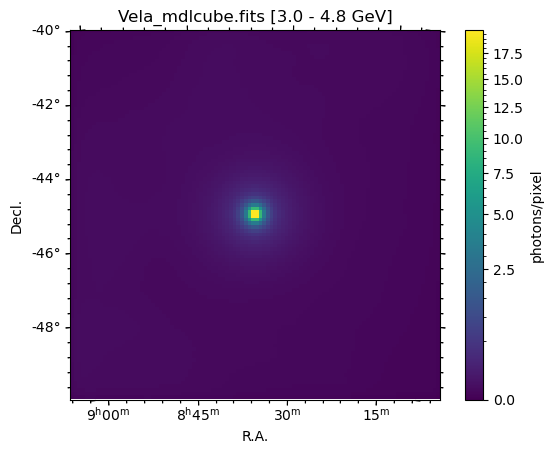

In [32]:
show_map('Vela2/Vela_mdlcube.fits', 5)#, outfile='fig_mdlmap.png')

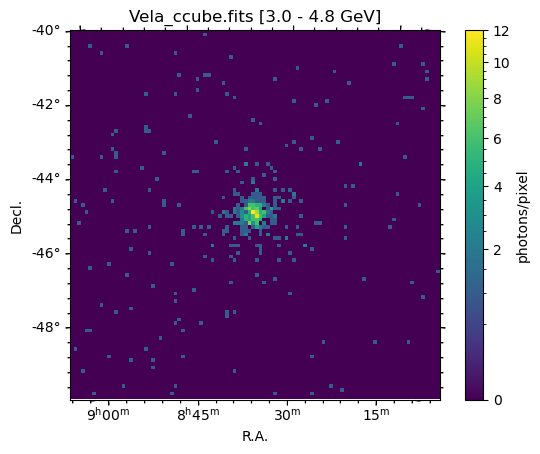

In [11]:
show_map('Vela2/Vela_ccube.fits')

In [40]:
%%bash

cat Vela2017/Vela_flux_BroadBand_binned.dat

3.000000000000000000e+03
3.000000000000000000e+05
2.086429602460292277e-07
9.020524847807648864e-09
3.634848679374125823e+03


In [ ]:
%%bash

year=2018
year2=$(($year+1))


# 1. generate the observation angle to see if the source is detectable in the given time interval
python  DmpST/scripts/FindObservedTime.py  DAMPE_SC.fits  Vela${year}  C  128.84  -45.18  ${year}-01-01  ${year2}-01-01

# 2. see the counts map, energy distribution to grasp the idea of the data
python  DmpST/scripts/GetInfo.py  DAMPE_PH.fits  Vela${year}  C  128.84  -45.18   5   0.1  CAR  3e3  3e5  10  ${year}-01-01  ${year2}-01-01

# 3. generate the live time cube for the given data set (13 mins for ord 5, 4 mins for ord 4)
# python DmpST/scripts/Dmpltcube.py  DAMPE_SC.fits  Vela2017/events.fits  Vela2017/ltcube.fits  --nthreads 2  -ord 5
python  DmpST/scripts/Dmpltcube.py  DAMPE_SC.fits  Vela${year}/events.fits  Vela${year}/ltcube.fits -ord 4

# 4. fit the data with the model
cp  Vela_input.yaml  Vela${year}/
python  DmpST/scripts/BinnedPipeline.py  Vela${year}/events.fits  DAMPE_SC.fits  Vela${year}/ltcube.fits   Vela${year}   Vela   C   \
128.84  -45.18    7   5   0.1  CAR  3e3  3e5  10  ${year}-01-01  ${year2}-01-01   --irf DmpST/DmpIRFs/

In [ ]:
# make a script

## 1. save the script above to a file named with 'run.sh'
## 2. add '#!/bin/bash' to the header of run.sh
## 3. run 'chmod +x run.sh'
## 4. then './run.sh'

Text(0, 0.5, 'Flux [$\\rm cm^{-2} s^{-1}$]')

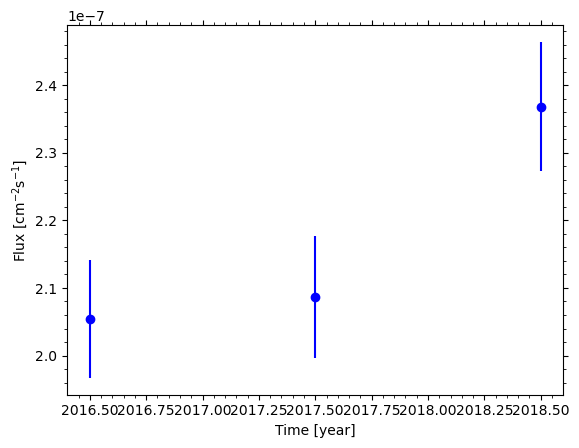

In [53]:
import numpy as np
from matplotlib import pyplot as plt

time = 2016.5
fluxdat = np.loadtxt('Vela2/Vela_flux_BroadBand_binned.dat') # 2016
plt.errorbar(time, fluxdat[2], yerr=fluxdat[3], marker='o', color='b')

time = 2017.5
fluxdat = np.loadtxt('Vela2017/Vela_flux_BroadBand_binned.dat') # 2017
plt.errorbar(time, fluxdat[2], yerr=fluxdat[3], marker='o', color='b')

time = 2018.5
fluxdat = np.loadtxt('Vela2018/Vela_flux_BroadBand_binned.dat') # 2018
plt.errorbar(time, fluxdat[2], yerr=fluxdat[3], marker='o', color='b')

plt.xlabel('Time [year]')
plt.ylabel('Flux [$\\rm cm^{-2} s^{-1}$]')

------
------
# Lecture 2: gamma-ray analyses in depth

Zhaoqiang Shen (zqshen@pmo.ac.cn) & Kaikai Duan (duankk@pmo.ac.cn)  
2024/06/27

**In the previous lecture,**
- we learnt the basic usage of **DmpST**,
- practised running the data analysis pipeline,
- fit the Vela model to the data.

```shell
# CLI: python BinnedPipeline.py               evfile           scfile          ltcube       path srcName GorC xref   yref rad freerad binsz proj emin emax ebins UTCmin UTCmax
python DmpST/scripts/BinnedPipeline.py  Vela2/events.fits  DAMPE_SC.fits  Vela2/ltcube.fits Vela2  Vela   C  128.84 -45.18 7   5  0.1   CAR  3e3  3e5 10 2016-01-01 2017-01-01 --irf DmpST/DmpIRFs/
```

This is what we get:

<img src="Vela2/Vela_flux_SED_binned.pdf" width="500" height="340">

*Good...*

## In this lecture
We will go a step further, and try to answer 
- *what has acturally been done* in the pipeline
<!-- - and *what can we do* in science. -->

------
## 1. About the binned pipeline
### Step 1: prepare data

- choose the region of interest around your source
- select the time interval, and the energy range
- bin the photons into the maps

<img src="images/img3.png" width="700" height="500">

In [12]:
## input from argument
path = 'analysis1'
srcname = 'Vela'

# on the data selection
ra, dec = 128.84, -45.18 #[deg], ra, dec of Vela pulsar
emin, emax = 3e3, 3e5 # [MeV], 3-300 GeV
roi = 7 # [deg], the radius of circular region
tmin, tmax = '2016-01-01', '2017-01-01'

# on the data binning
ebins = 10 # 10 energy bins between 3-300 GeV
freerad = 5 # [deg], radius of the inscribed circle of the rectangular ROI
binsz = 0.2 # [deg], the size of each pixel

# input files
evfile = 'DAMPE_PH.fits' # events file
scfile = 'DAMPE_SC.fits'

In [13]:
from DmpST import Events, DmpTime

# line 36-37
minmet, maxmet = DmpTime.UTC2MET(tmin), DmpTime.UTC2MET(tmax)

# line 47-54
allevents = Events.Events(evfile)

ROIevents = allevents.CircleSelect(outfile='{}/{}_events.fits'.format(path, srcname), # output event file
    xref=ra, yref=dec, rad=roi, tmin=minmet, tmax=maxmet, emin=emin, emax=emax, # selection
    GorC='C', cosThetamin=0.5, cosThetamax=1, evtype=2) # misc parameters

npix = int(2*freerad/binsz)
# the energy integrated map
ROIevents.Cmap(outfile='{}/{}_cmap.fits'.format(path, srcname), 
    nxpix=npix, nypix=npix, binsz=binsz, GorC='C', xref=ra, yref=dec, proj='CAR')
# the map w/ energy bins
ROIevents.Ccube(outfile='{}/{}_ccube.fits'.format(path, srcname), # output counts cube file
    nxpix=npix, nypix=npix, binsz=binsz, xref=ra, yref=dec, GorC='C', proj='CAR', # the pixel binning
    emin=emin, emax=emax, ebins=ebins) # energy binning

make cmap for the photons.................................
make ccube for the photons.................................


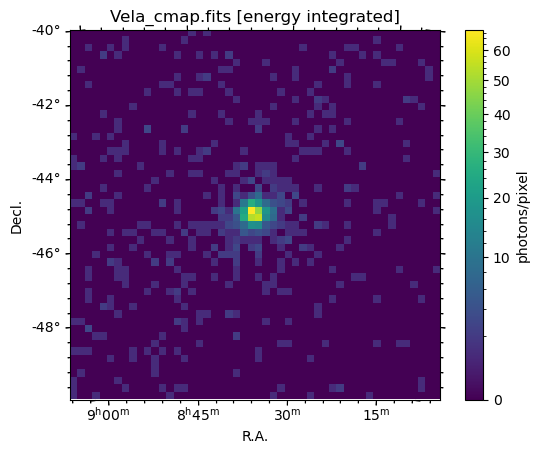

In [14]:
# Let's see the binned map w/ energy integrated
import numpy as np
from matplotlib import pyplot as plt, colors
from DmpST import SkyMap
%matplotlib inline

cmapfile = '{}/{}_cmap.fits'.format(path, srcname)
cmap = SkyMap.Cmap(cmapfile)

fig = plt.figure()#figsize=(6, 5))
fig.add_subplot(111, projection=cmap.wcs)
im = plt.imshow(cmap.data.T, origin='lower', norm=colors.PowerNorm(0.5))
cb = plt.colorbar(im, label='photons/pixel')
plt.xlabel('R.A.')
plt.ylabel('Decl.')
plt.title(cmapfile.split('/')[-1] + ' [energy integrated]')
plt.show()

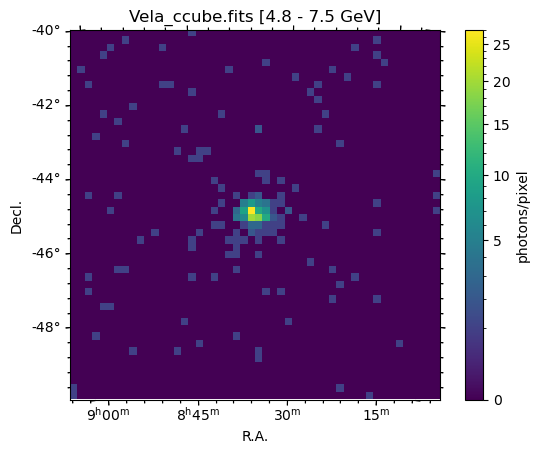

In [15]:
# the binned map in each energy bin
ccubefile = '{}/{}_ccube.fits'.format(path, srcname)
ccube = SkyMap.Ccube(ccubefile)

ibin = 1 # which energy bin to analyze

fig = plt.figure()#figsize=(6, 5))
fig.add_subplot(111, projection=ccube.wcs)
im = plt.imshow(ccube.data[:,:,ibin].T, origin='lower', norm=colors.PowerNorm(0.5))
cb = plt.colorbar(im, label='photons/pixel')
plt.xlabel('R.A.')
plt.ylabel('Decl.')
plt.title(ccubefile.split('/')[-1] + ' [%.1f - %.1f GeV]'%(ccube.emins[ibin]/1e3, ccube.emaxs[ibin]/1e3))
plt.show()

-----
### Step 2: construct gamma-ray model and fit

<img src="images/img4.png" width="700" height="500">

In gamma-ray data analyses, the inference of the source's parameters is done by 
comparing the parameterized maps to the observed ones.

- The map *without* instrumental responses is


    <img src="images/eq1.png" width="300" height="340">

    **ModelMap $ \sim \sum_i^{n_{comp}}$ Flux$_i$ $\times$ Exposure$_i$**

- The map *with* instrumental responses is

    <img src="images/eq2.png" width="400" height="340">


Now let's first calculate the livetime cube, which tell us **for the given data what the observing time is at each point in the sky**.
With it, we can easily calculate the exposure ($\sim$ area $\times$ time).

In [16]:
%%bash
# let's first run this because it will take a lot of time
python DmpST/scripts/Dmpltcube.py DAMPE_SC.fits analysis1/Vela_events.fits Vela_ltcube.fits -ord 5
# NOTE: please use -ord 6 in real data analysis. Here we set ord=5 so as to speed up the calculation

There are several components, as clearly shown in the map, in the sky:
- **point-like sources**  (only Vela here): $$S(E,\hat{p},t) = \sum_i s_i(E,t)\delta(\hat{p}-\hat{p}_i)$$
- **isotropic emission**: $$+ S_{eg}(E,\hat{p})$$
- **galactic diffuse emission** (map is below): $$+ S_G(E,\hat{p})$$
 

<img src="images/img5.png" width="700" height="500">
    

Based on it, we can make a parameterized model as follows:

```yaml
Vela:
  name: Vela
  type: PointSource
  spatialModel:
    type: SkyDirFunction
    RA:  {free: 0, max: 360.0,min: -360.0, name: RA,  scale: 1.0, value: 128.84}
    DEC: {free: 0, max: 90.0, min: -90.0,  name: DEC, scale: 1.0, value: -45.18}
  spectrum:
    type: PowerLaw2
    Integral:   {free: 1, min: 1e-3, max: 1e3, name: Integral,   scale: 1e-8, value: 1}
    Index:      {free: 1, min: 0,    max: 10,  name: Index,      scale: -1,   value: 2}
    LowerLimit: {free: 0, min: 3e3,  max: 1e6, name: LowerLimit, scale: 1,    value: 3e3}
    UpperLimit: {free: 0, min: 3e3,  max: 1e6, name: UpperLimit, scale: 1,    value: 3e5}

gal_diffuse_source:
  name: gal_diffuse_source
  type: DiffuseSource
  spatialModel:
    type: MapcubeFunction
    Normalization: {free: 0, max: 1e3, min: 1e-3, name: Normalization, scale: 1.0, value: 1.0}
    file: dampe_gal_diffuse_model_v2_fix.fits
  spectrum:
    type: PowerLaw
    Prefactor: {free: 1, max: 10,  min: 0,   name: Prefactor, scale: 1,   value: 1}
    Index:     {free: 0, max: 1,   min: -1,  name: Index,     scale: 1.0, value: 0}
    Scale:     {free: 0, max: 1e4, min: 3e3, name: Scale,     scale: 1.0, value: 5000}

iso_diffuse_source:
  name: iso_diffuse_source
  type: DiffuseSource
  spatialModel:
    type: ConstantValue
    Value: {free: 0, max: 10.0, min: 0.0, name: Value, scale: 1.0, value: 1.0}
  spectrum:
    type: PowerLaw2
    Integral:   {free: 1, max: 1e3, min: 1e-3, name: Integral,   scale: 1e-7,value: 1}
    Index:      {free: 0, min: 0,   max: 10,   name: Index,      scale: -1,  value: 2.4}
    LowerLimit: {free: 0, min: 3e3, max: 1e6,  name: LowerLimit, scale: 1,   value: 3e3}
    UpperLimit: {free: 0, min: 3e3, max: 1e6,  name: UpperLimit, scale: 1,   value: 3e5}
```

For the Galactic diffuse emission and isotropic emission, the recommendation parameters are set as above.
For the point sources, you may either set by yourself or simply refer to the DAMPE point catalog.

In [17]:
from DmpST import LikelihoodAnalysis, Model

pars= {'srcName': 'Vela',
        'ltcube': 'Vela_ltcube.fits',
         'ccube': 'analysis1/Vela_ccube.fits',
       'srcmaps': 'analysis1/Vela_srcmaps.fits',
        'srcmdl': 'analysis1/Vela_input.yaml',
          'emin': emin,
          'emax': emax,
   'cosThetamin': 0.5,
   'cosThetamax': 1.,
           'irf': 'DmpST/DmpIRFs',
        'evtype': 2,
      'CubeType': 'Map'}

# calculate the expected map of each component and convolve the responses
Binned = LikelihoodAnalysis.BinnedAnalysis(**pars)

'Binned Analysis parameters:'
{'CubeType': 'Map',
 'ccube': 'analysis1/Vela_ccube.fits',
 'cosThetamax': 1.0,
 'cosThetamin': 0.5,
 'emax': 300000.0,
 'emin': 3000.0,
 'evtype': 2,
 'irf': 'DmpST/DmpIRFs',
 'ltcube': 'Vela_ltcube.fits',
 'srcName': 'Vela',
 'srcmaps': 'analysis1/Vela_srcmaps.fits',
 'srcmdl': 'analysis1/Vela_input.yaml'}
analysis1/Vela_srcmaps.fits
the energy range is [0]:3000.0MeV to [9]:300000.0MeV
Add  Vela
Add  gal_diffuse_source
Add  iso_diffuse_source


### Step 3: Fit the model to the data

<img src="images/img6.png" width="700" height="500">

In [18]:
import warnings
warnings.filterwarnings("ignore")

Binned.Fit(hesse=True, Npred=True, Flux=True, TsValue=True, srcmaps=True, mdlcube=True)

Binned.SaveFitModel('analysis1/Vela_fitModel_BroadBand_binned.yaml') # the fitted model
Binned.SaveFitResults('analysis1/Vela_results_BroadBand_binned.yaml') # a summary of fitted parameters
Binned.SaveMdlCube('analysis1/modelcube_global.fits') # save the best-fit model map

Minuit Starting......
{'Vela__Index': 2.0, 'limit_Vela__Index': (0.0, 10.0), 'error_Vela__Index': 0.2, 'Vela__Integral': 1.0, 'limit_Vela__Integral': (0.001, 1000.0), 'error_Vela__Integral': 0.1, 'gal_diffuse_source__Prefactor': 1.0, 'limit_gal_diffuse_source__Prefactor': (0.0, 10.0), 'error_gal_diffuse_source__Prefactor': 0.1, 'iso_diffuse_source__Integral': 1.0, 'limit_iso_diffuse_source__Integral': (0.001, 1000.0), 'error_iso_diffuse_source__Integral': 0.1}
Migrad Start......
Calculate the srcmap for Vela
Calculate the srcmap for gal_diffuse_source
Calculate the srcmap for iso_diffuse_source
Hesse Start......
Calculate Npred of Vela
Calculate Npred of gal_diffuse_source
Calculate Npred of iso_diffuse_source
Calculate Flux of Vela
Calculate Flux of gal_diffuse_source
Calculate Flux of iso_diffuse_source
Calculate TsValue of Vela
Minuit Starting......
{'gal_diffuse_source__Prefactor': 1.1209283035395705, 'limit_gal_diffuse_source__Prefactor': (0.0, 10.0), 'error_gal_diffuse_source__Pr

#### 1. model map
The model map is the expected counts map that generated assuming the best-fit sources' parameters

Let's have a look.

In [19]:
%%bash
# first to see what is the index of the cube
fitsinfo analysis1/modelcube_global.fits

Filename: analysis1/modelcube_global.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SKYMAP        1 PrimaryHDU      23   (50, 50, 10)   int64   
  1  EBOUNDS       1 BinTableHDU     15   10R x 2C   [D, D]   
  2  Vela          1 ImageHDU        24   (50, 50, 10)   float64   
  3  gal_diffuse_source    1 ImageHDU        24   (50, 50, 10)   float64   
  4  iso_diffuse_source    1 ImageHDU        24   (50, 50, 10)   float64   
  5  AllSource     1 ImageHDU        24   (50, 50, 10)   float64   


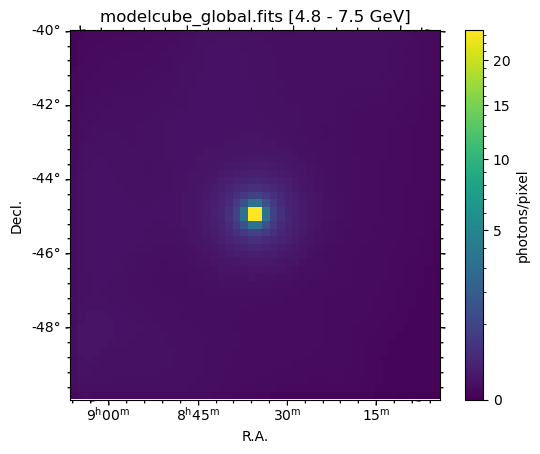

In [20]:
# the binned model cube in each energy bin
mcubefile = 'analysis1/modelcube_global.fits'
mcube = SkyMap.Ccube(mcubefile, hdu=5) # the index of AllSource is 5

ibin = 1 # which energy bin to analyze

fig = plt.figure()#figsize=(6, 5))
fig.add_subplot(111, projection=mcube.wcs)
im = plt.imshow(mcube.data[:,:,ibin].T, origin='lower', norm=colors.PowerNorm(0.5))
cb = plt.colorbar(im, label='photons/pixel')
plt.xlabel('R.A.')
plt.ylabel('Decl.')
plt.title(mcubefile.split('/')[-1] + ' [%.1f - %.1f GeV]'%(mcube.emins[ibin]/1e3, mcube.emaxs[ibin]/1e3))
plt.show()

#### 2. summary of best-fit parameters

In [21]:
%%bash
# cat analysis1/Vela_fitModel_BroadBand_binned.yaml
cat analysis1/Vela_results_BroadBand_binned.yaml

LikelihoodValue: 2532.391793876096
Vela:
  DEC_value: '-45.18'
  Flux_error: '9.21e-09'
  Flux_value: '2.18e-07'
  Index_error: '0.11'
  Index_scale: '-1.00e+00'
  Index_value: '3.30'
  Integral_error: '0.92'
  Integral_scale: '1.00e-08'
  Integral_value: '21.82'
  LowerLimit_value: '3000.00'
  Npred: '610.36'
  RA_value: '128.84'
  TsValue: 3625.7256985488993
  UpperLimit_value: '300000.00'
gal_diffuse_source:
  Flux_error: '1.69e-06'
  Flux_value: '9.99e-06'
  Index_value: '0.00'
  Normalization_scale: '1.00e+00'
  Normalization_value: '1.00'
  Npred: '270.04'
  Prefactor_error: '0.19'
  Prefactor_scale: '1.00e+00'
  Prefactor_value: '1.12'
  Scale_value: '100.00'
  TsValue: 35.529414757471386
iso_diffuse_source:
  Flux_error: '6.10e-06'
  Flux_value: '9.29e-06'
  Index_value: '-2.40'
  Integral_error: '4.85'
  Integral_scale: '1.00e-07'
  Integral_value: '7.40'
  LowerLimit_value: '3000.00'
  Npred: '65.65'
  TsValue: 2.557233693820308
  UpperLimit_value: '300000.00'
  Value_scale: 

#### 3. spectrum checking
Sometimes the spectral parameterization may not be good, you can check the spectral energy 
distribution (SED) obtained from the pipeline. Here we will not show the code (but I can
tell you that it basically run the same fitting in every energy bins).

Here I only refer to the results that you have already obtained.

(3e-06, 0.002)

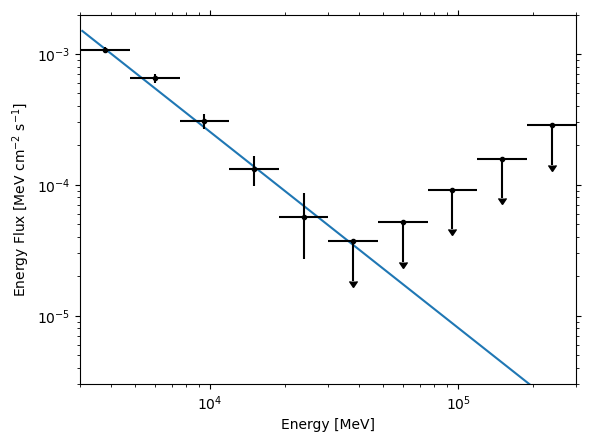

In [22]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def plotsed_simple(global_specfile, sed_specfile):
    # global fit
    Es, dNdEgls = np.loadtxt(global_specfile).T
    
    # sed
    data = np.loadtxt(sed_specfile)
    emins, emaxs, fluxs, fluxerrs, tsvals, fluxuls = data[:,0], data[:,1], data[:,2], data[:,3], data[:,4], data[:,5]
    
    emids = np.sqrt(emins * emaxs)
    eerrs = np.array([emids-emins, emaxs-emids])
    E2dNdEs = emids**2 * fluxs / (emaxs - emins)
    E2dNdEers = emids**2 * fluxerrs / (emaxs - emins)
    E2dNdEuls = emids**2 * fluxuls / (emaxs - emins)                                                                                                          
    
    # make figure
    fig, ax = plt.subplots()     
    condition = (Es>=emins[0]) & (Es<= emaxs[-1])
    plt.plot(Es[condition], Es[condition]**2 * dNdEgls[condition])
    ax.errorbar(emids[tsvals>9], E2dNdEs[tsvals>9], xerr=eerrs[:,tsvals>9], yerr=E2dNdEers[tsvals>9], fmt='.k', label='DAMPE')
    ax.errorbar(emids[tsvals<9], E2dNdEuls[tsvals<9], xerr=eerrs[:,tsvals<9], yerr=E2dNdEuls[tsvals<9]/2., fmt='.k', uplims=True)
    ax.set_xlim(emins[0], emaxs[-1])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'Energy [MeV]')
    ax.set_ylabel(r'Energy Flux [MeV cm$^{-2}$ s$^{-1}$]')

## make plot
plotsed_simple('analysis0/Vela_BroadBand_Spectrum.dat', 'analysis0/Vela_flux_SED_binned.dat')
plt.ylim(3e-6,2e-3)


### Step 4: what we can further do?

#### improve the spectral parameterization

Here is part of the our model
```yaml
Vela:
  spectrum:
    type: PowerLaw2
    Integral:   {free: 1, min: 1e-3, max: 1e3, name: Integral,   scale: 1e-8, value: 1}
    Index:      {free: 1, min: 0,    max: 10,  name: Index,      scale: -1,   value: 2}
    LowerLimit: {free: 0, min: 3e3,  max: 1e6, name: LowerLimit, scale: 1,    value: 3e3}
    UpperLimit: {free: 0, min: 3e3,  max: 1e6, name: UpperLimit, scale: 1,    value: 3e5}
```

You may find the PowerLaw model can not well fit the SED of the source, probably you can change to something like LogParabola spectrum
```yaml
Vela:
  spectrum:
    type: LogParabola
    norm:  {free: 1, min: 1e-3, max: 1e3, name: norm,  scale: 1e-9, value: 1}
    alpha: {free: 1, min: -10,  max: 10,  name: alpha, scale: 1,    value: 2}
    Eb:    {free: 0, min: 1e3,  max: 1e6, name: Eb,    scale: 1,    value: 2e3}
    beta:  {free: 1, min: -10,  max: 10, name: beta,   scale: 1,    value: 0.4}
```

Actually, we have implemented all the spectral types that Fermi-LAT science has. You can check [**here**](https://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/source_models.html) for the details on the spectral types.


In [23]:
%%bash
# revise the yaml file
cat analysis2/Vela_input.yaml

Vela:
  name: Vela
  type: PointSource
  spatialModel:
    type: SkyDirFunction
    RA: {free: 0, max: 360.0,min: -360.0,name: RA, scale: 1.0, value: 128.84}
    DEC: {free: 0, max: 90.0, min: -90.0, name: DEC, scale: 1.0, value: -45.18}
  spectrum:
    type: LogParabola
    norm:  {free: 1, min: 1e-3, max: 1e3, name: norm,  scale: 1e-9, value: 1}
    alpha: {free: 1, min: -10,  max: 10,  name: alpha, scale: 1,    value: 2}
    Eb:    {free: 0, min: 1e3,  max: 1e6, name: Eb,    scale: 1,    value: 2e3}
    beta:  {free: 1, min: -10,  max: 10, name: beta,   scale: 1,    value: 0.4}

gal_diffuse_source:
  name: gal_diffuse_source
  type: DiffuseSource
  spatialModel:
    type: MapCubeFunction
    Normalization: {free: 0, max: 1e3, min: 1e-3, name: Normalization, scale: 1.0, value: 1.0}
    file: dampe_gal_diffuse_model_v2_fix.fits
  spectrum:
    type: PowerLaw
    Prefactor: {free: 1, max: 10, min: 0, name: Prefactor, scale: 1, value: 1}
    Index: {free: 0, max: 1, min: -1, name: Index

In [ ]:
%%bash
# rerun the pipeline
python DmpST/scripts/BinnedPipeline.py DAMPE_PH.fits DAMPE_SC.fits Vela_ltcube.fits analysis2 Vela   C  128.84 -45.18 7   5  0.1   \
CAR  3e3  3e5 10 2016-01-01 2017-01-01 --irf DmpST/DmpIRFs/

In [25]:
%%bash
#check the results
cat analysis2/Vela_results_BroadBand_binned.yaml

LikelihoodValue: 5098.665383820684
Vela:
  DEC_value: '-45.18'
  Eb_value: '2000.00'
  Flux_error: nan
  Flux_value: '2.07e-07'
  Npred: '606.42'
  RA_value: '128.84'
  TsValue: 3672.9656293089374
  alpha_error: '0.50'
  alpha_scale: '1.00e+00'
  alpha_value: '2.54'
  beta_error: '0.22'
  beta_scale: '1.00e+00'
  beta_value: '0.42'
  norm_error: '0.11'
  norm_scale: '1.00e-09'
  norm_value: '0.46'
gal_diffuse_source:
  Flux_error: '1.71e-06'
  Flux_value: '9.88e-06'
  Index_value: '0.00'
  Normalization_scale: '1.00e+00'
  Normalization_value: '1.00'
  Npred: '266.70'
  Prefactor_error: '0.19'
  Prefactor_scale: '1.00e+00'
  Prefactor_value: '1.11'
  Scale_value: '100.00'
  TsValue: 34.01851648122647
iso_diffuse_source:
  Flux_error: '6.19e-06'
  Flux_value: '1.03e-05'
  Index_value: '-2.40'
  Integral_error: '4.92'
  Integral_scale: '1.00e-07'
  Integral_value: '8.21'
  LowerLimit_value: '3000.00'
  Npred: '72.91'
  TsValue: 3.0762767263804562
  UpperLimit_value: '300000.00'
  Value_s

(3e-06, 0.002)

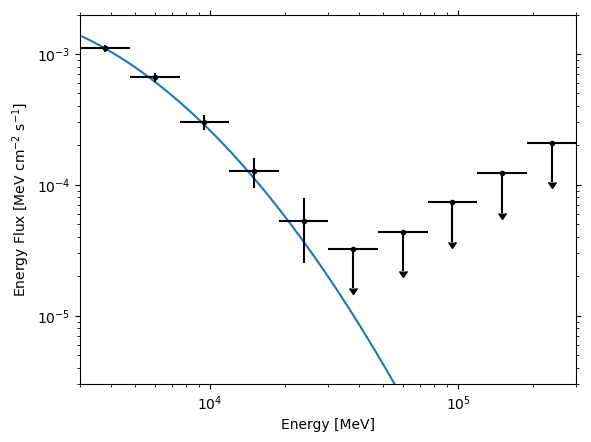

In [26]:
plotsed_simple('analysis2/Vela_BroadBand_Spectrum.dat', 'analysis2/Vela_flux_SED_binned.dat')
plt.ylim(3e-6,2e-3)

*The fitting is significantly improved.*

#### 2. improve the spatial model

You may be also interested in the morphology of the source. Here Vela is a **point source**, so
```yaml
  type: PointSource
  spatialModel:
    type: SkyDirFunction
    RA:  {free: 0, max: 360.0,min: -360.0, name: RA,  scale: 1.0, value: 128.84}
    DEC: {free: 0, max: 90.0, min: -90.0,  name: DEC, scale: 1.0, value: -45.18}
```

For some sources, the morphologies can be extended. We have the following choices for the extended sources:
- 2D disk:
  ```yaml
  type: DiffuseSource
  spatialModel:
    type: RadialDisk
    RA:  {free: 0, max: 360.0,min: -360.0, name: RA,  scale: 1.0, value: 345.494}
    DEC: {free: 0, max: 90.0, min: -90.0,  name: DEC, scale: 1.0, value: 58.92}
    Radius: {free: 0, max: 10, min: 0,  name: Radius, scale: 1.0, value: 0.249}
  ```
- 2D gaussian:
  ```yaml
  type: DiffuseSource
  spatialModel:
    type: RadialGaussian
    RA:  {free: 0, max: 360.0,min: -360.0, name: RA,  scale: 1.0, value: 225.254}
    DEC: {free: 0, max: 90.0, min: -90.0,  name: DEC, scale: 1.0, value: -63.179}
    Sigma: {free: 0, max: 10, min: 0,  name: Sigma, scale: 1.0, value: 0.853}
  ```
- or even a map:
  ```yaml
  type: DiffuseSource
  spatialModel:
    type: SpatialMap
    file: "xxx.fits"
    Prefactor: {free: 0, max: 10.0, min: 0.0, name: Prefactor, scale: 1.0, value: 1.0}
  ```

# homework 1: The light curve of Vela

# homework 2: Report of the status in the space science or astronomy in your country

- Q&A time: 2024-07-25

- deadline: 2024-08-15

- website: https://apsco.casmooc.cn